# Step 1. Create your custom dataset featuring 3 custom categories of at least 100 images each

In [12]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Define class names (from CIFAR-10)
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'ship', 'truck']

# Select the indices for the desired categories (e.g., cat, dog, bird)
categories = [2, 3, 5]  # bird, cat, dog

# Create masks to extract the desired categories
train_mask = np.isin(y_train, categories).flatten()
test_mask = np.isin(y_test, categories).flatten()

# Filter the data to include only the selected categories
x_train_custom, y_train_custom = x_train[train_mask], y_train[train_mask]
x_test_custom, y_test_custom = x_test[test_mask], y_test[test_mask]

# Re-map class labels to start from 0
y_train_custom = np.array([categories.index(i) for i in y_train_custom.flatten()])
y_test_custom = np.array([categories.index(i) for i in y_test_custom.flatten()])


In [14]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Select the indices for the desired categories (bird, cat, dog)
categories = [2, 3, 5]  # bird, cat, dog

# Create masks to extract the desired categories
train_mask = np.isin(y_train, categories).flatten()
test_mask = np.isin(y_test, categories).flatten()

# Filter the data to include only the selected categories
x_train_custom, y_train_custom = x_train[train_mask], y_train[train_mask]
x_test_custom, y_test_custom = x_test[test_mask], y_test[test_mask]

# Re-map class labels to start from 0
y_train_custom = np.array([categories.index(i) for i in y_train_custom.flatten()])
y_test_custom = np.array([categories.index(i) for i in y_test_custom.flatten()])

# Count the number of occurrences for each category
bird_count_train = np.sum(y_train_custom == 0)  # bird
cat_count_train = np.sum(y_train_custom == 1)   # cat
dog_count_train = np.sum(y_train_custom == 2)   # dog

bird_count_test = np.sum(y_test_custom == 0)    # bird
cat_count_test = np.sum(y_test_custom == 1)     # cat
dog_count_test = np.sum(y_test_custom == 2)     # dog

# Print counts
print(f"Training set - bird: {bird_count_train}, cat: {cat_count_train}, dog: {dog_count_train}")
print(f"Test set - bird: {bird_count_test}, cat: {cat_count_test}, dog: {dog_count_test}")


Training set - bird: 5000, cat: 5000, dog: 5000
Test set - bird: 1000, cat: 1000, dog: 1000


Utilized CIFAR-10 dataset for custom image genration, and loaded bird, cat, dog categories. 
Filetred the data include only bird, cat, dog categories and re-mapped labels from 0.

# Step 2. Split this data between 80% training and 20% test



In [15]:
from sklearn.model_selection import train_test_split

# Split custom train data into 80% training and 20% validation set
x_train_final, x_val_final, y_train_final, y_val_final = train_test_split(
    x_train_custom, y_train_custom, test_size=0.2, random_state=42)


# Step 3. Preprocess the data as you see fit



In [16]:
# Normalize the images to the range [0, 1]
x_train_final = x_train_final.astype('float32') / 255.0
x_val_final = x_val_final.astype('float32') / 255.0
x_test_custom = x_test_custom.astype('float32') / 255.0


In [17]:
import tensorflow as tf

# Resize the training, validation, and test sets
x_train_resized = tf.image.resize(x_train_final, (75, 75))
x_val_resized = tf.image.resize(x_val_final, (75, 75))
x_test_resized = tf.image.resize(x_test_custom, (75, 75))

# Step 4. Create a Convolutional Neural Network model to learn about your training set 

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Create a CNN model
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax')  # 3 categories in the custom dataset
])

cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the CNN model
cnn_model.fit(x_train_final, y_train_final, epochs=10, validation_data=(x_val_final, y_val_final))


Epoch 1/10


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.4718 - loss: 1.0149 - val_accuracy: 0.6167 - val_loss: 0.8443
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6277 - loss: 0.8323 - val_accuracy: 0.6430 - val_loss: 0.8001
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.6606 - loss: 0.7574 - val_accuracy: 0.6637 - val_loss: 0.7685
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7065 - loss: 0.6807 - val_accuracy: 0.6920 - val_loss: 0.7130
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7402 - loss: 0.6175 - val_accuracy: 0.6813 - val_loss: 0.7301
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7660 - loss: 0.5607 - val_accuracy: 0.6850 - val_loss: 0.7390
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8063 - loss: 0.4719 - val_accuracy: 0.7020 - val_loss: 0.7218
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.8400 - loss: 0.4008 - val_accuracy: 0.7043 - val_

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Create a CNN model
cnn_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax')  # 3 categories in the custom dataset
])

cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the CNN model
cnn_model.fit(x_train_final, y_train_final, epochs=20, validation_data=(x_val_final, y_val_final))


Epoch 1/20


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.4837 - loss: 1.0097 - val_accuracy: 0.6120 - val_loss: 0.8465
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6190 - loss: 0.8375 - val_accuracy: 0.6397 - val_loss: 0.8168
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6527 - loss: 0.7767 - val_accuracy: 0.6467 - val_loss: 0.8238
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7004 - loss: 0.6982 - val_accuracy: 0.6773 - val_loss: 0.7382
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7274 - loss: 0.6358 - val_accuracy: 0.6760 - val_loss: 0.7543
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7434 - loss: 0.5966 - val_accuracy: 0.6850 - val_loss: 0.7196
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7815 - loss: 0.5212 - val_accuracy: 0.6800 - val_loss: 0.7492
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8118 - loss: 0.4587 - val_accuracy: 0.7047 - val_

# Step 5. Make predictions on the test data and compare them to the expected categories

In [19]:
# Evaluate the model on the test set
test_loss, test_acc = cnn_model.evaluate(x_test_custom, y_test_custom)
print(f"Test Accuracy: {test_acc}")

# Make predictions on the test set
predictions = cnn_model.predict(x_test_custom)
predicted_classes = np.argmax(predictions, axis=1)


94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7029 - loss: 0.8381
Test Accuracy: 0.7039999961853027
94/94 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


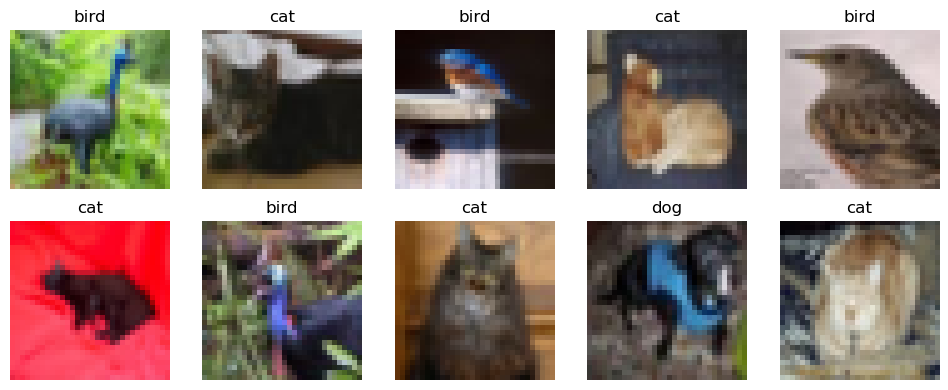

In [20]:
import matplotlib.pyplot as plt

# Display the first 10 images and their corresponding labels from the custom training set
images, labels = [], []
for i in range(10):
    images.append(x_train_custom[i])
    labels.append(y_train_custom[i])

# My custom dataset consists of these classes
class_names_custom = ['bird', 'cat', 'dog']

# Plotting the first 10 images
plt.figure(figsize=(12, 12))
for i in range(10):
    plt.subplot(5, 5, i + 1)
    plt.imshow(images[i])
    plt.title(class_names_custom[labels[i]])  # Custom class names
    plt.axis('off')

plt.show()

# Step 6: Use GoogleNet(InceptionNet) and add a LinearLayer on top of it.

In [22]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model

# Load InceptionV3 with pre-trained weights, excluding the top layers
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(75, 75, 3))

# Add a GlobalAveragePooling layer and a Dense layer on top
x = base_model.output
x = GlobalAveragePooling2D()(x)
predictions = Dense(3, activation='softmax')(x)  # 3 categories

# Create the full model
google_net_model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
google_net_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the GoogleNet model with resized images
google_net_model.fit(x_train_resized, y_train_final, epochs=10, validation_data=(x_val_resized, y_val_final))


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 29s 71ms/step - accuracy: 0.5631 - loss: 0.9559 - val_accuracy: 0.6647 - val_loss: 0.7793
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 26s 71ms/step - accuracy: 0.6990 - loss: 0.7005 - val_accuracy: 0.6807 - val_loss: 0.7503
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 26s 70ms/step - accuracy: 0.7156 - loss: 0.6614 - val_accuracy: 0.6757 - val_loss: 0.7709
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 27s 73ms/step - accuracy: 0.7260 - loss: 0.6335 - val_accuracy: 0.6700 - val_loss: 0.7548
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 28s 75ms/step - accuracy: 0.7258 - loss: 0.6348 - val_accuracy: 0.6783 - val_loss: 0.7780
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 28s 75ms/step - accuracy: 0.7354 - loss: 0.6167 - val_accuracy: 0.6730 - val_loss: 0.7831
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 29s 77ms/step - accuracy: 0.7391 - loss: 0.6024 - val_accuracy: 0.6663 - val_loss: 0.7679
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 33s 87ms/step - accuracy: 0.7363 - loss: 0.6073 - 

In [24]:
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model

# Load InceptionV3 with pre-trained weights, excluding the top layers
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(75, 75, 3))

# Add a GlobalAveragePooling layer and a Dense layer on top
x = base_model.output
x = GlobalAveragePooling2D()(x)
predictions = Dense(3, activation='softmax')(x)  # 3 categories

# Create the full model
google_net_model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
google_net_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the GoogleNet model with resized images
google_net_model.fit(x_train_resized, y_train_final, epochs=20, validation_data=(x_val_resized, y_val_final))


Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 28s 69ms/step - accuracy: 0.5547 - loss: 0.9446 - val_accuracy: 0.6573 - val_loss: 0.7919
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 26s 70ms/step - accuracy: 0.7036 - loss: 0.6928 - val_accuracy: 0.6620 - val_loss: 0.7642
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 26s 69ms/step - accuracy: 0.7160 - loss: 0.6617 - val_accuracy: 0.6597 - val_loss: 0.7586
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 44s 117ms/step - accuracy: 0.7234 - loss: 0.6464 - val_accuracy: 0.6690 - val_loss: 0.7611
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 43s 114ms/step - accuracy: 0.7295 - loss: 0.6274 - val_accuracy: 0.6653 - val_loss: 0.7708
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 39s 104ms/step - accuracy: 0.7393 - loss: 0.6115 - val_accuracy: 0.6783 - val_loss: 0.7690
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 37s 99ms/step - accuracy: 0.7395 - loss: 0.6044 - val_accuracy: 0.6683 - val_loss: 0.7747
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 37s 100ms/step - accuracy: 0.7470 - loss: 0.588

Step 7: Train the GoogleNet model and compare the accuracy with the first model.



In [25]:
# Evaluate the model on the resized test set
test_loss_gnet, test_acc_gnet = google_net_model.evaluate(x_test_resized, y_test_custom)
print(f"GoogleNet Test Accuracy: {test_acc_gnet}")


94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 53ms/step - accuracy: 0.6669 - loss: 0.8474
GoogleNet Test Accuracy: 0.6776666641235352


With Google Net  the accuracy is lower than the Simple CNN for CIFAR 10 Dataset